In [ ]:
# Author : Amir Shokri
# github link : https://github.com/amirshnll/Cryotherapy
# dataset link : http://archive.ics.uci.edu/ml/datasets/Cryotherapy+Dataset+
# email : amirsh.nll@gmail.com

In [3]:
import pandas
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [4]:
columns =['Result_of_Treatment','sex', 'age', 'Time', 'Number_of_Warts','Type','Area']
cry= pandas.read_csv("Cryotherapy.csv",header=None, names=columns)

In [5]:
print(cry)

    Result_of_Treatment  sex  age   Time  Number_of_Warts  Type  Area
0                     0    1   35  12.00                5     1   100
1                     1    1   29   7.00                5     1    96
2                     0    1   50   8.00                1     3   132
3                     0    1   32  11.75                7     3   750
4                     0    1   67   9.25                1     1    42
..                  ...  ...  ...    ...              ...   ...   ...
84                    1    1   30   0.25               10     1   115
85                    0    2   34  12.00                3     3    95
86                    1    2   20   3.50                6     1    75
87                    0    2   35   8.25                8     3   100
88                    1    1   24  10.75               10     1    20

[89 rows x 7 columns]


In [6]:
inputs =cry.drop('Result_of_Treatment',axis='columns')
target =cry['Result_of_Treatment']

In [7]:
print(inputs)

    sex  age   Time  Number_of_Warts  Type  Area
0     1   35  12.00                5     1   100
1     1   29   7.00                5     1    96
2     1   50   8.00                1     3   132
3     1   32  11.75                7     3   750
4     1   67   9.25                1     1    42
..  ...  ...    ...              ...   ...   ...
84    1   30   0.25               10     1   115
85    2   34  12.00                3     3    95
86    2   20   3.50                6     1    75
87    2   35   8.25                8     3   100
88    1   24  10.75               10     1    20

[89 rows x 6 columns]


In [8]:
input_train,input_test,target_train,target_test=train_test_split(inputs,target,test_size=0.3,random_state=1)

In [9]:
print (input_train.shape, target_train.shape)
print (input_test.shape, target_test.shape)

(62, 6) (62,)
(27, 6) (27,)


In [10]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(input_train,target_train)
y_pred =dtree.predict(input_test)
y_pred

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0], dtype=int64)

In [12]:
from sklearn.metrics import classification_report, accuracy_score
result1 = classification_report(target_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(target_test,y_pred)
print("Accuracy:",result2)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.85      0.85      0.85        13

    accuracy                           0.85        27
   macro avg       0.85      0.85      0.85        27
weighted avg       0.85      0.85      0.85        27

Accuracy: 0.8518518518518519


[Text(121.74545454545455, 203.85, 'X[2] <= 8.125\ngini = 0.498\nsamples = 89\nvalue = [42, 47]'),
 Text(60.872727272727275, 176.67000000000002, 'X[1] <= 45.5\ngini = 0.172\nsamples = 42\nvalue = [4, 38]'),
 Text(30.436363636363637, 149.49, 'gini = 0.0\nsamples = 38\nvalue = [0, 38]'),
 Text(91.30909090909091, 149.49, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(182.61818181818182, 176.67000000000002, 'X[1] <= 16.5\ngini = 0.31\nsamples = 47\nvalue = [38, 9]'),
 Text(152.1818181818182, 149.49, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(213.05454545454546, 149.49, 'X[4] <= 2.5\ngini = 0.206\nsamples = 43\nvalue = [38, 5]'),
 Text(182.61818181818182, 122.31, 'X[3] <= 7.5\ngini = 0.33\nsamples = 24\nvalue = [19, 5]'),
 Text(121.74545454545455, 95.13, 'X[5] <= 130.0\ngini = 0.188\nsamples = 19\nvalue = [17, 2]'),
 Text(91.30909090909091, 67.94999999999999, 'X[1] <= 40.5\ngini = 0.105\nsamples = 18\nvalue = [17, 1]'),
 Text(60.872727272727275, 40.77000000000001, 'gini = 0.0\nsamp

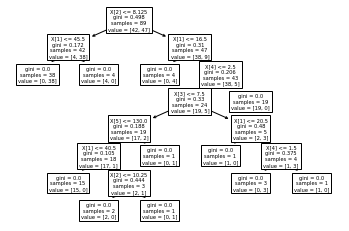

In [25]:
from sklearn import tree
tree.plot_tree(dtree.fit(inputs,target))